In [1]:
import numpy as np
import pandas as pd

In [2]:
loan_data_inputs_train = pd.read_csv('data/loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('data/loan_data_targets_train.csv', index_col = 0, header = 0)
loan_data_inputs_test = pd.read_csv('data/loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('data/loan_data_targets_test.csv', index_col = 0, header = 0)

In [4]:
loan_data_inputs_train.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,...,1,0,0,1,0,0,0,0,0,0
206088,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,...,0,0,0,1,0,0,0,0,0,0
136020,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,...,0,0,0,1,0,0,0,0,0,0
412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,...,0,0,0,1,0,0,0,0,0,0
36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,...,0,1,0,1,0,0,0,0,0,0


In [3]:
# loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col = 0)
# loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col = 0, header = 0)
# loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col = 0)
# loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv', index_col = 0, header = 0)

In [5]:
loan_data_inputs_train.shape

(373028, 324)

In [6]:
loan_data_targets_train.shape

(373028, 1)

In [7]:
loan_data_inputs_test.shape

(93257, 324)

In [8]:
loan_data_targets_test.shape

(93257, 1)

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
reg = LogisticRegression()

In [12]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86']]

In [13]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [14]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)


In [15]:
reg.fit(inputs_train,loan_data_targets_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [16]:
reg.intercept_

array([-0.38819139])

In [17]:
reg.coef_

array([[ 0.94234557,  0.90757518,  0.75817322,  0.55956431,  0.32470251,
         0.12009459,  0.10519696,  0.11991232,  0.04479887,  0.06696526,
         0.07931537,  0.07044399,  0.08885154,  0.15579961,  0.12327884,
         0.19668157,  0.25300974,  0.23975176,  0.27048825,  0.33664074,
         0.48603477,  0.08357744,  0.02258453,  0.33009643,  0.2216697 ,
         0.21775101,  0.25672079,  0.1145818 ,  0.10578597,  0.08338617,
         0.10576353,  0.06900316,  0.05880047,  0.12723721,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.49869246,  0.95812366,  0.46308064,  0.1930676 ,  0.00955307,
        -0.00327401, -0.0569417 , -0.0911838 , -0.04739253, -0.02065051,
        -0.08871012, -0.09787369,  0.39107401,  0.22803002,  0.00418949,
         0.07977295, -0.01182465, -0.05716267, -0.0889211 , -0.07347971,
        -0.04295182, -0.10404727,  0.17069233,  0.1235411 , -0.01405667,
         0.03730897,  0.26449523,  0.10859865,  0.1

In [18]:
feature_name = inputs_train.columns.values

In [23]:
pd.set_option('display.max_rows', 10)  

In [24]:
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)

# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1 # Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg.intercept_[0]] # Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index() # Sorts the dataframe by index.
summary_table

,Feature name,Coefficients
0,Intercept,-0.388191
1,grade:A,0.942346
2,grade:B,0.907575
3,grade:C,0.758173
4,grade:D,0.559564
...,...,...
100,mths_since_last_record:3-20,0.271641
101,mths_since_last_record:21-31,0.214085
102,mths_since_last_record:32-80,0.424629
103,mths_since_last_record:81-86,0.018398


# LogisticRegression Model with p-values

In [25]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(max_iter=1000,*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        from sklearn.feature_selection import chi2
        scores, pvalues = chi2(inputs_train, loan_data_targets_train)
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        #self.z_scores = z_scores
        self.p_values = pvalues
        

In [26]:
reg = LogisticRegression_with_p_values()

In [27]:
reg.fit(inputs_train, loan_data_targets_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
pd.set_option('display.max_rows', None)  

In [29]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-0.388191
1,grade:A,0.942346
2,grade:B,0.907575
3,grade:C,0.758173
4,grade:D,0.559564
5,grade:E,0.324703
6,grade:F,0.120095
7,home_ownership:OWN,0.105197
8,home_ownership:MORTGAGE,0.119912
9,addr_state:NM_VA,0.044799


In [30]:
p_values = reg.p_values
p_values = np.append(np.nan, np.array(p_values))

In [31]:
summary_table['p_values'] = p_values

In [32]:
pd.set_option('display.max_rows', None)


In [33]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86']]

In [34]:
# the column removed by p-value (>0.05)
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [35]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
427211,True,False,False,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0
206088,False,False,True,False,False,False,False,True,0,False,...,0,1,0,0,1,0,0,0,0,0
136020,True,False,False,False,False,False,False,True,0,False,...,0,0,1,0,1,0,0,0,0,0
412305,False,False,False,True,False,False,False,False,0,False,...,0,1,0,0,1,0,0,0,0,0
36159,False,False,True,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0


In [36]:
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
feature_name = inputs_train.columns.values

In [39]:
pd.set_option('display.max_rows',10)  

In [40]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-0.343976
1,grade:A,0.942261
2,grade:B,0.913842
3,grade:C,0.755156
4,grade:D,0.557217
...,...,...
80,mths_since_last_record:3-20,0.289333
81,mths_since_last_record:21-31,0.208292
82,mths_since_last_record:32-80,0.391594
83,mths_since_last_record:81-86,-0.048009


In [32]:
p_values = reg2.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.343976,NaN
1,grade:A,0.942261,0.000000e+00
2,grade:B,0.913842,1.784444e-227
3,grade:C,0.755156,6.162241e-07
4,grade:D,0.557217,1.660384e-272
5,grade:E,0.307054,0.000000e+00
6,grade:F,0.084146,0.000000e+00
7,home_ownership:OWN,0.123877,2.786529e-01
8,home_ownership:MORTGAGE,0.125850,5.696552e-75
9,addr_state:NM_VA,0.060406,1.040852e-02


In [33]:
import pickle

In [34]:
pickle.dump(reg2, open('pd_model.sav', 'wb'))

# PD model validation

In [35]:
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86']]

In [36]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [37]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
362514,False,False,True,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0
288564,False,False,False,False,True,False,False,True,0,False,...,0,0,0,0,1,0,0,0,0,0
213591,False,False,True,False,False,False,False,True,0,False,...,0,0,1,0,1,0,0,0,0,0
263083,False,False,True,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0
165001,True,False,False,False,False,False,False,True,0,False,...,0,0,1,0,1,0,0,0,0,0


In [38]:
y_hat_test = reg2.model.predict(inputs_test)

In [39]:
y_hat_test

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
# We want to set a threshold to classify someone as a good or bad borrower. For example, a score below 0.3 would indicate a bad borrower

In [40]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)

In [41]:
y_hat_test_proba

array([[0.08149971, 0.91850029],
       [0.14366805, 0.85633195],
       [0.08161136, 0.91838864],
       ...,
       [0.03211706, 0.96788294],
       [0.05169917, 0.94830083],
       [0.04906291, 0.95093709]])

In [42]:
y_hat_test_proba = y_hat_test_proba[: ][: , 1]

In [43]:
loan_data_targets_test_temp = loan_data_targets_test

In [44]:
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)

In [45]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)

In [46]:
df_actual_predicted_probs.shape

(93257, 2)

In [47]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [48]:
df_actual_predicted_probs.index = loan_data_inputs_test.index

In [49]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
362514,1,0.918500
288564,1,0.856332
213591,1,0.918389
263083,1,0.931864
165001,1,0.970231


# Accuracy and Area under the Curve

In [50]:
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [51]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,7416,2774
1,36679,46388


In [52]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.079522,0.029746
1,0.393311,0.497421


In [53]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.5769432857587098

In [54]:
from sklearn.metrics import roc_curve, roc_auc_score

In [55]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99990186, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 9.63077997e-05, ...,
        9.99963885e-01, 9.99963885e-01, 1.00000000e+00]),
 array([       inf, 0.99135426, 0.98932383, ..., 0.51882975, 0.50231484,
        0.49221723]))

In [56]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'],
                                 df_actual_predicted_probs['y_hat_test_proba'])

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

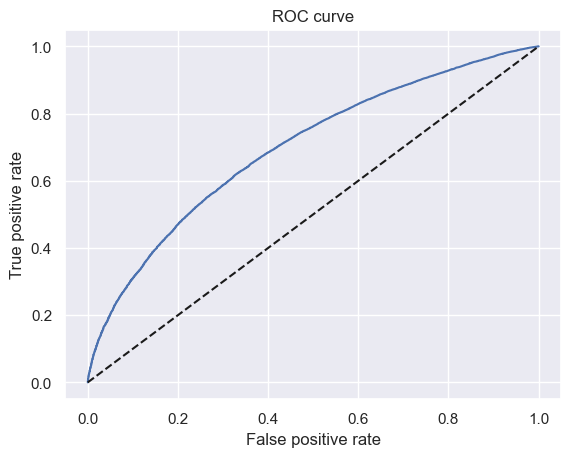

In [58]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [59]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.6973073369377638

# Gini and Kolmogorov-Smirnov

In [60]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')

In [61]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
118702,1,0.492217,0
79004,1,0.499585,0
465157,1,0.500258,0
42396,0,0.502315,0
42344,1,0.518830,0


In [62]:
df_actual_predicted_probs.tail()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
291631,1,0.989520,1
266566,1,0.989682,1
239228,1,0.990031,1
416618,1,0.990285,1
242624,1,0.991354,1


In [63]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()

In [64]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,118702,1,0.492217,0
1,79004,1,0.499585,0
2,465157,1,0.500258,0
3,42396,0,0.502315,0
4,42344,1,0.518830,0


In [65]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()

In [66]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,118702,1,0.492217,0,1,1,0
1,79004,1,0.499585,0,2,2,0
2,465157,1,0.500258,0,3,3,0
3,42396,0,0.502315,0,4,3,1
4,42344,1,0.518830,0,5,4,1


In [67]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())

In [68]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,118702,1,0.492217,0,1,1,0,0.000011,0.000012,0.000000
1,79004,1,0.499585,0,2,2,0,0.000021,0.000024,0.000000
2,465157,1,0.500258,0,3,3,0,0.000032,0.000036,0.000000
3,42396,0,0.502315,0,4,3,1,0.000043,0.000036,0.000098
4,42344,1,0.518830,0,5,4,1,0.000054,0.000048,0.000098


In [69]:
df_actual_predicted_probs.tail()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
93252,291631,1,0.989520,1,93253,83063,10190,0.999957,0.999952,1.0
93253,266566,1,0.989682,1,93254,83064,10190,0.999968,0.999964,1.0
93254,239228,1,0.990031,1,93255,83065,10190,0.999979,0.999976,1.0
93255,416618,1,0.990285,1,93256,83066,10190,0.999989,0.999988,1.0
93256,242624,1,0.991354,1,93257,83067,10190,1.000000,1.000000,1.0


Text(0.5, 1.0, 'Gini')

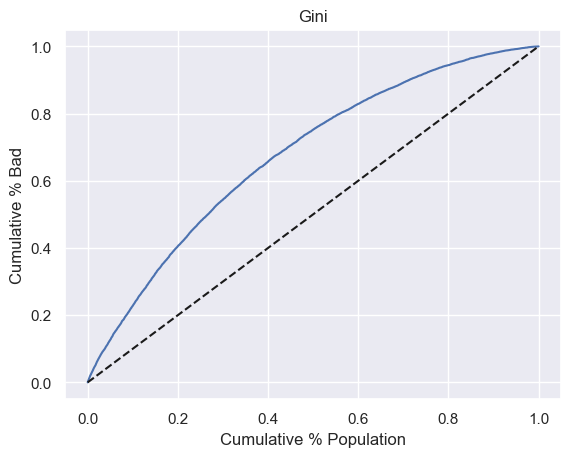

In [70]:
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')

In [71]:
Gini = AUROC * 2 - 1
Gini

0.3946146738755276

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

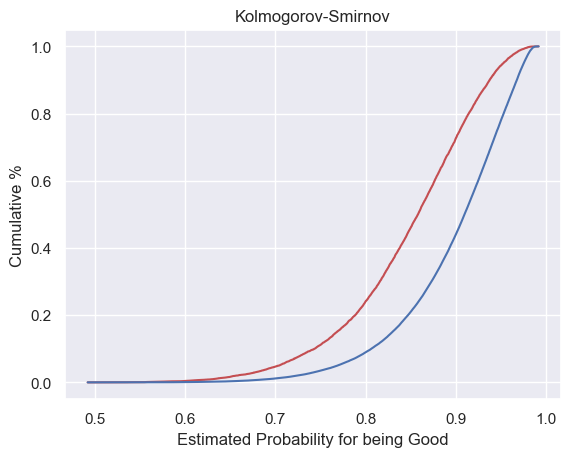

In [72]:
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

In [73]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
KS

0.29066121743148016

# Applying the PD Model

In [74]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,...,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
362514,False,False,True,False,False,False,False,0,False,True,...,0,0,0,1,0,0,0,0,0,0
288564,False,False,False,False,True,False,False,0,False,True,...,0,0,0,1,0,0,0,0,0,0
213591,False,False,True,False,False,False,False,0,False,True,...,0,1,0,1,0,0,0,0,0,0
263083,False,False,True,False,False,False,False,0,False,True,...,0,0,0,1,0,0,0,0,0,0
165001,True,False,False,False,False,False,False,0,False,True,...,0,1,0,1,0,0,0,0,0,0


In [75]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.343976,NaN
1,grade:A,0.942261,0.000000e+00
2,grade:B,0.913842,1.784444e-227
3,grade:C,0.755156,6.162241e-07
4,grade:D,0.557217,1.660384e-272
5,grade:E,0.307054,0.000000e+00
6,grade:F,0.084146,0.000000e+00
7,home_ownership:OWN,0.123877,2.786529e-01
8,home_ownership:MORTGAGE,0.125850,5.696552e-75
9,addr_state:NM_VA,0.060406,1.040852e-02


In [76]:
y_hat_test_proba

array([0.91850029, 0.85633195, 0.91838864, ..., 0.96788294, 0.94830083,
       0.95093709])

# Score card

In [77]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.343976,NaN
1,grade:A,0.942261,0.000000e+00
2,grade:B,0.913842,1.784444e-227
3,grade:C,0.755156,6.162241e-07
4,grade:D,0.557217,1.660384e-272
5,grade:E,0.307054,0.000000e+00
6,grade:F,0.084146,0.000000e+00
7,home_ownership:OWN,0.123877,2.786529e-01
8,home_ownership:MORTGAGE,0.125850,5.696552e-75
9,addr_state:NM_VA,0.060406,1.040852e-02


In [78]:
ref_categories

['grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose:educ__sm_b__wedd__ren_en__mov__house',
 'initial_list_status:f',
 'term:60',
 'emp_length:0',
 'mths_since_issue_d:>84',
 'int_rate:>20.281',
 'mths_since_earliest_cr_line:<140',
 'inq_last_6mths:>6',
 'acc_now_delinq:0',
 'annual_inc:<20K',
 'dti:>35',
 'mths_since_last_delinq:0-3',
 'mths_since_last_record:0-2']

In [79]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
# We create a new dataframe with one column. Its values are the values from the 'reference_categories' list.
# We name it 'Feature name'.
df_ref_categories['Coefficients'] = 0
# We create a second column, called 'Coefficients', which contains only 0 values.
df_ref_categories['p_values'] = np.nan
# We create a third column, called 'p_values', with contains only NaN values.
df_ref_categories

,Feature name,Coefficients,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:ND_NE_IA_NV_FL_HI_AL,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:educ__sm_b__wedd__ren_en__mov__house,0,NaN
5,initial_list_status:f,0,NaN
6,term:60,0,NaN
7,emp_length:0,0,NaN
8,mths_since_issue_d:>84,0,NaN
9,int_rate:>20.281,0,NaN


In [81]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
df_scorecard

,Feature name,Coefficients,p_values
0,Intercept,-0.343976,NaN
1,grade:A,0.942261,0.000000e+00
2,grade:B,0.913842,1.784444e-227
3,grade:C,0.755156,6.162241e-07
4,grade:D,0.557217,1.660384e-272
5,grade:E,0.307054,0.000000e+00
6,grade:F,0.084146,0.000000e+00
7,home_ownership:OWN,0.123877,2.786529e-01
8,home_ownership:MORTGAGE,0.125850,5.696552e-75
9,addr_state:NM_VA,0.060406,1.040852e-02


In [82]:
df_scorecard = df_scorecard.reset_index()
df_scorecard

,index,Feature name,Coefficients,p_values
0,0,Intercept,-0.343976,NaN
1,1,grade:A,0.942261,0.000000e+00
2,2,grade:B,0.913842,1.784444e-227
3,3,grade:C,0.755156,6.162241e-07
4,4,grade:D,0.557217,1.660384e-272
5,5,grade:E,0.307054,0.000000e+00
6,6,grade:F,0.084146,0.000000e+00
7,7,home_ownership:OWN,0.123877,2.786529e-01
8,8,home_ownership:MORTGAGE,0.125850,5.696552e-75
9,9,addr_state:NM_VA,0.060406,1.040852e-02


In [83]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]
# We create a new column, called 'Original feature name', which contains the value of the 'Feature name' column,
# up to the column symbol.
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,-0.343976,NaN,Intercept
1,1,grade:A,0.942261,0.000000e+00,grade
2,2,grade:B,0.913842,1.784444e-227,grade
3,3,grade:C,0.755156,6.162241e-07,grade
4,4,grade:D,0.557217,1.660384e-272,grade
5,5,grade:E,0.307054,0.000000e+00,grade
6,6,grade:F,0.084146,0.000000e+00,grade
7,7,home_ownership:OWN,0.123877,2.786529e-01,home_ownership
8,8,home_ownership:MORTGAGE,0.125850,5.696552e-75,home_ownership
9,9,addr_state:NM_VA,0.060406,1.040852e-02,addr_state


In [84]:
min_score = 300
max_score = 850

In [85]:
df_scorecard.groupby('Original feature name')['Coefficients'].min()


Original feature name
Intercept                     -0.343976
acc_now_delinq                 0.000000
addr_state                     0.000000
annual_inc                    -0.154442
dti                           -0.122552
emp_length                     0.000000
grade                          0.000000
home_ownership                 0.000000
initial_list_status            0.000000
inq_last_6mths                -0.019941
int_rate                       0.000000
mths_since_earliest_cr_line   -0.104086
mths_since_issue_d             0.000000
mths_since_last_delinq         0.000000
mths_since_last_record        -0.048009
purpose                        0.000000
term                           0.000000
verification_status            0.000000
Name: Coefficients, dtype: float64

In [86]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
# Up to the 'min()' method everything is the same as in te line above.
# Then, we aggregate further and sum all the minimum values.
min_sum_coef

-0.7930049299460191

In [87]:

df_scorecard.groupby('Original feature name')['Coefficients'].max()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.

Original feature name
Intercept                     -0.343976
acc_now_delinq                 0.270455
addr_state                     0.519751
annual_inc                     0.520604
dti                            0.151484
emp_length                     0.142732
grade                          0.942261
home_ownership                 0.125850
initial_list_status            0.124010
inq_last_6mths                 0.382891
int_rate                       0.986176
mths_since_earliest_cr_line    0.000000
mths_since_issue_d             0.509471
mths_since_last_delinq         0.205166
mths_since_last_record         0.391594
purpose                        0.373651
term                           0.088199
verification_status            0.061058
Name: Coefficients, dtype: float64

In [88]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
# Up to the 'min()' method everything is the same as in te line above.
# Then, we aggregate further and sum all the maximum values.
max_sum_coef

5.451377168624993

In [91]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients']   * (max_score - min_score) / (max_sum_coef - min_sum_coef)
# We multiply the value of the 'Coefficients' column by the ration of the differences between
# maximum score and minimum score and maximum sum of coefficients and minimum sum of cefficients.
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-0.343976,NaN,Intercept,-30.297140
1,1,grade:A,0.942261,0.000000e+00,grade,82.993535
2,2,grade:B,0.913842,1.784444e-227,grade,80.490460
3,3,grade:C,0.755156,6.162241e-07,grade,66.513494
4,4,grade:D,0.557217,1.660384e-272,grade,49.079188
5,5,grade:E,0.307054,0.000000e+00,grade,27.045060
6,6,grade:F,0.084146,0.000000e+00,grade,7.411548
7,7,home_ownership:OWN,0.123877,2.786529e-01,home_ownership,10.910991
8,8,home_ownership:MORTGAGE,0.125850,5.696552e-75,home_ownership,11.084796
9,9,addr_state:NM_VA,0.060406,1.040852e-02,addr_state,5.320498


In [92]:
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
# We divide the difference of the value of the 'Coefficients' column and the minimum sum of coefficients by
# the difference of the maximum sum of coefficients and the minimum sum of coefficients.
# Then, we multiply that by the difference between the maximum score and the minimum score.
# Then, we add minimum score. 
df_scorecard

/var/folders/2h/rjm2fb_j53gb0nswwgx_xyfc0000gn/T/ipykernel_36398/1410049194.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-0.343976,NaN,Intercept,339.550077
1,1,grade:A,0.942261,0.000000e+00,grade,82.993535
2,2,grade:B,0.913842,1.784444e-227,grade,80.490460
3,3,grade:C,0.755156,6.162241e-07,grade,66.513494
4,4,grade:D,0.557217,1.660384e-272,grade,49.079188
5,5,grade:E,0.307054,0.000000e+00,grade,27.045060
6,6,grade:F,0.084146,0.000000e+00,grade,7.411548
7,7,home_ownership:OWN,0.123877,2.786529e-01,home_ownership,10.910991
8,8,home_ownership:MORTGAGE,0.125850,5.696552e-75,home_ownership,11.084796
9,9,addr_state:NM_VA,0.060406,1.040852e-02,addr_state,5.320498


In [93]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
# We round the values of the 'Score - Calculation' column.
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,-0.343976,NaN,Intercept,339.550077,340.0
1,1,grade:A,0.942261,0.000000e+00,grade,82.993535,83.0
2,2,grade:B,0.913842,1.784444e-227,grade,80.490460,80.0
3,3,grade:C,0.755156,6.162241e-07,grade,66.513494,67.0
4,4,grade:D,0.557217,1.660384e-272,grade,49.079188,49.0
5,5,grade:E,0.307054,0.000000e+00,grade,27.045060,27.0
6,6,grade:F,0.084146,0.000000e+00,grade,7.411548,7.0
7,7,home_ownership:OWN,0.123877,2.786529e-01,home_ownership,10.910991,11.0
8,8,home_ownership:MORTGAGE,0.125850,5.696552e-75,home_ownership,11.084796,11.0
9,9,addr_state:NM_VA,0.060406,1.040852e-02,addr_state,5.320498,5.0


In [94]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.
# Sums all minimum values.
min_sum_score_prel

300.0

In [95]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.
# Sums all maximum values.
max_sum_score_prel

851.0

In [96]:
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference
0,0,Intercept,-0.343976,NaN,Intercept,339.550077,340.0,0.449923
1,1,grade:A,0.942261,0.000000e+00,grade,82.993535,83.0,0.006465
2,2,grade:B,0.913842,1.784444e-227,grade,80.490460,80.0,-0.490460
3,3,grade:C,0.755156,6.162241e-07,grade,66.513494,67.0,0.486506
4,4,grade:D,0.557217,1.660384e-272,grade,49.079188,49.0,-0.079188
5,5,grade:E,0.307054,0.000000e+00,grade,27.045060,27.0,-0.045060
6,6,grade:F,0.084146,0.000000e+00,grade,7.411548,7.0,-0.411548
7,7,home_ownership:OWN,0.123877,2.786529e-01,home_ownership,10.910991,11.0,0.089009
8,8,home_ownership:MORTGAGE,0.125850,5.696552e-75,home_ownership,11.084796,11.0,-0.084796
9,9,addr_state:NM_VA,0.060406,1.040852e-02,addr_state,5.320498,5.0,-0.320498


In [97]:
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference
0,0,Intercept,-0.343976,NaN,Intercept,339.550077,340.0,0.449923
1,1,grade:A,0.942261,0.000000e+00,grade,82.993535,83.0,0.006465
2,2,grade:B,0.913842,1.784444e-227,grade,80.490460,80.0,-0.490460
3,3,grade:C,0.755156,6.162241e-07,grade,66.513494,67.0,0.486506
4,4,grade:D,0.557217,1.660384e-272,grade,49.079188,49.0,-0.079188
5,5,grade:E,0.307054,0.000000e+00,grade,27.045060,27.0,-0.045060
6,6,grade:F,0.084146,0.000000e+00,grade,7.411548,7.0,-0.411548
7,7,home_ownership:OWN,0.123877,2.786529e-01,home_ownership,10.910991,11.0,0.089009
8,8,home_ownership:MORTGAGE,0.125850,5.696552e-75,home_ownership,11.084796,11.0,-0.084796
9,9,addr_state:NM_VA,0.060406,1.040852e-02,addr_state,5.320498,5.0,-0.320498


In [98]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][77] = 16
df_scorecard

/var/folders/2h/rjm2fb_j53gb0nswwgx_xyfc0000gn/T/ipykernel_36398/1528914224.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_scorecard['Score - Final'][77] = 16
/var/folders/2h/rjm2fb_j53gb0nswwgx_xyfc0000gn/T/ipykernel_36398/152891422

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-0.343976,NaN,Intercept,339.550077,340.0,0.449923,340.0
1,1,grade:A,0.942261,0.000000e+00,grade,82.993535,83.0,0.006465,83.0
2,2,grade:B,0.913842,1.784444e-227,grade,80.490460,80.0,-0.490460,80.0
3,3,grade:C,0.755156,6.162241e-07,grade,66.513494,67.0,0.486506,67.0
4,4,grade:D,0.557217,1.660384e-272,grade,49.079188,49.0,-0.079188,49.0
5,5,grade:E,0.307054,0.000000e+00,grade,27.045060,27.0,-0.045060,27.0
6,6,grade:F,0.084146,0.000000e+00,grade,7.411548,7.0,-0.411548,7.0
7,7,home_ownership:OWN,0.123877,2.786529e-01,home_ownership,10.910991,11.0,0.089009,11.0
8,8,home_ownership:MORTGAGE,0.125850,5.696552e-75,home_ownership,11.084796,11.0,-0.084796,11.0
9,9,addr_state:NM_VA,0.060406,1.040852e-02,addr_state,5.320498,5.0,-0.320498,5.0


In [99]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.
# Sums all minimum values.
min_sum_score_prel

300.0

In [100]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.
# Sums all maximum values.
max_sum_score_prel

849.0

# Caclulating Credit Score

In [101]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,...,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
362514,False,False,True,False,False,False,False,0,False,True,...,0,0,0,1,0,0,0,0,0,0
288564,False,False,False,False,True,False,False,0,False,True,...,0,0,0,1,0,0,0,0,0,0
213591,False,False,True,False,False,False,False,0,False,True,...,0,1,0,1,0,0,0,0,0,0
263083,False,False,True,False,False,False,False,0,False,True,...,0,0,0,1,0,0,0,0,0,0
165001,True,False,False,False,False,False,False,0,False,True,...,0,1,0,1,0,0,0,0,0,0


In [102]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-0.343976,NaN,Intercept,339.550077,340.0,0.449923,340.0
1,1,grade:A,0.942261,0.000000e+00,grade,82.993535,83.0,0.006465,83.0
2,2,grade:B,0.913842,1.784444e-227,grade,80.490460,80.0,-0.490460,80.0
3,3,grade:C,0.755156,6.162241e-07,grade,66.513494,67.0,0.486506,67.0
4,4,grade:D,0.557217,1.660384e-272,grade,49.079188,49.0,-0.079188,49.0
5,5,grade:E,0.307054,0.000000e+00,grade,27.045060,27.0,-0.045060,27.0
6,6,grade:F,0.084146,0.000000e+00,grade,7.411548,7.0,-0.411548,7.0
7,7,home_ownership:OWN,0.123877,2.786529e-01,home_ownership,10.910991,11.0,0.089009,11.0
8,8,home_ownership:MORTGAGE,0.125850,5.696552e-75,home_ownership,11.084796,11.0,-0.084796,11.0
9,9,addr_state:NM_VA,0.060406,1.040852e-02,addr_state,5.320498,5.0,-0.320498,5.0


In [103]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [104]:
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)
# We insert a column in the dataframe, with an index of 0, that is, in the beginning of the dataframe.
# The name of that column is 'Intercept', and its values are 1s.

In [105]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,...,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
362514,1,False,False,True,False,False,False,False,0,False,...,0,0,0,1,0,0,0,0,0,0
288564,1,False,False,False,False,True,False,False,0,False,...,0,0,0,1,0,0,0,0,0,0
213591,1,False,False,True,False,False,False,False,0,False,...,0,1,0,1,0,0,0,0,0,0
263083,1,False,False,True,False,False,False,False,0,False,...,0,0,0,1,0,0,0,0,0,0
165001,1,True,False,False,False,False,False,False,0,False,...,0,1,0,1,0,0,0,0,0,0


In [106]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]
# Here, from the 'inputs_test_with_ref_cat_w_intercept' dataframe, we keep only the columns with column names,
# exactly equal to the row values of the 'Feature name' column from the 'df_scorecard' dataframe.

In [107]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,...,emp_length:0,mths_since_issue_d:>84,int_rate:>20.281,mths_since_earliest_cr_line:<140,inq_last_6mths:>6,acc_now_delinq:0,annual_inc:<20K,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2
362514,1,False,False,True,False,False,False,False,True,0,...,1,0,0,0,0,1,0,0,0,0
288564,1,False,False,False,False,True,False,False,True,0,...,0,0,1,0,0,1,0,0,1,0
213591,1,False,False,True,False,False,False,False,True,0,...,0,1,0,0,0,1,0,0,0,0
263083,1,False,False,True,False,False,False,False,True,0,...,0,0,0,0,0,1,0,0,0,0
165001,1,True,False,False,False,False,False,False,True,0,...,0,1,0,0,0,1,0,0,0,0


In [108]:
scorecard_scores = df_scorecard['Score - Final']

In [109]:
inputs_test_with_ref_cat_w_intercept.shape

(93257, 102)

In [110]:
scorecard_scores.shape

(102,)

In [111]:
scorecard_scores = scorecard_scores.values.reshape(102, 1)

In [112]:
scorecard_scores.shape

(102, 1)

In [113]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)
# Here we multiply the values of each row of the dataframe by the values of each column of the variable,
# which is an argument of the 'dot' method, and sum them. It's essentially the sum of the products.

In [114]:
y_scores.head()

,0
362514,583.0
288564,528.0
213591,583.0
263083,601.0
165001,675.0


In [115]:
y_scores.tail()

,0
115,567.0
296284,656.0
61777,670.0
91763,626.0
167512,631.0


# From credit score to PD

In [125]:
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef
# We divide the difference between the scores and the minimum score by
# the difference between the maximum score and the minimum score.
# Then, we multiply that by the difference between the maximum sum of coefficients and the minimum sum of coefficients.
# Then, we add the minimum sum of coefficients.

In [ ]:
sum_coef_from_score

In [126]:
if not isinstance(sum_coef_from_score, np.ndarray):
    sum_coef_from_score = np.array(sum_coef_from_score)

# Ensure the array is of float type
sum_coef_from_score = sum_coef_from_score.astype(float)

In [128]:
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
# Here we divide an exponent raised to sum of coefficients from score by
# an exponent raised to sum of coefficients from score plus one.
y_hat_proba_from_score

array([[0.91834076],
       [0.85760946],
       [0.91834076],
       ...,
       [0.96794621],
       [0.94825083],
       [0.95096662]])

In [129]:
y_hat_test_proba[0: 5]

array([0.91850029, 0.85633195, 0.91838864, 0.93186374, 0.97023107])

# Setting Cut-off

In [130]:
# We need the confusion matrix again.
#np.where(np.squeeze(np.array(loan_data_targets_test)) == np.where(y_hat_test_proba >= tr, 1, 0), 1, 0).sum() / loan_data_targets_test.shape[0]
tr = 0.9
# 1 mean 
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)
#df_actual_predicted_probs['loan_data_targets_test'] == np.where(df_actual_predicted_probs['y_hat_test_proba'] >= tr, 1, 0)

In [131]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,7416,2774
1,36679,46388


In [132]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.079522,0.029746
1,0.393311,0.497421


In [133]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.5769432857587098

In [134]:
from sklearn.metrics import roc_curve, roc_auc_score

In [135]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99990186, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 9.63077997e-05, ...,
        9.99963885e-01, 9.99963885e-01, 1.00000000e+00]),
 array([       inf, 0.99135426, 0.98932383, ..., 0.51882975, 0.50231484,
        0.49221723]))

In [136]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

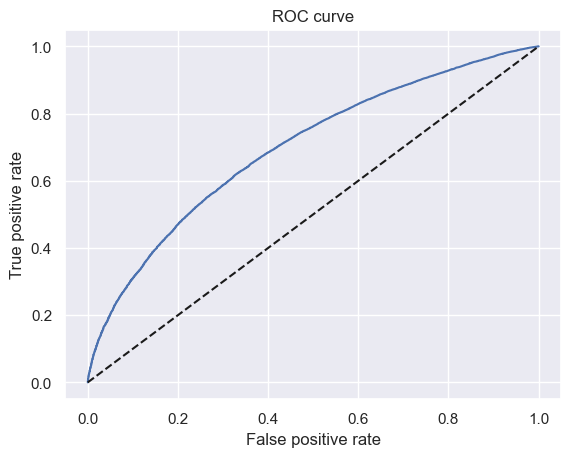

In [138]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [139]:
thresholds

array([       inf, 0.99135426, 0.98932383, ..., 0.51882975, 0.50231484,
       0.49221723])

In [140]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)
# We concatenate 3 dataframes along the columns.

In [141]:
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']
# We name the columns of the dataframe 'thresholds', 'fpr', and 'tpr'.

In [142]:
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)
# Let the first threshold (the value of the thresholds column with index 0) be equal to a number, very close to 1
# but smaller than 1, say 1 - 1 / 10 ^ 16.

/var/folders/2h/rjm2fb_j53gb0nswwgx_xyfc0000gn/T/ipykernel_36398/2460372339.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)


In [143]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()


In [144]:
df_cutoffs['Score'][0] = max_score

/var/folders/2h/rjm2fb_j53gb0nswwgx_xyfc0000gn/T/ipykernel_36398/3137964156.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_cutoffs['Score'][0] = max_score


In [145]:
# We define a function called 'n_approved' which assigns a value of 1 if a predicted probability
# is greater than the parameter p, which is a threshold, and a value of 0, if it is not.
# Then it sums the column.
# Thus, if given any percentage values, the function will return
# the number of rows wih estimated probabilites greater than the threshold. 
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

In [146]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
# Assuming that all credit applications above a given probability of being 'good' will be approved,
# when we apply the 'n_approved' function to a threshold, it will return the number of approved applications.
# Thus, here we calculate the number of approved appliations for al thresholds.
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
# Then, we calculate the number of rejected applications for each threshold.
# It is the difference between the total number of applications and the approved applications for that threshold.
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]
# Approval rate equalts the ratio of the approved applications and all applications.
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']
# Rejection rate equals one minus approval rate.

In [148]:
pd.set_option('display.max_rows', 10)


In [149]:
df_cutoffs.iloc[5000: 6200, ]
# Here we display the dataframe with cutoffs form line with index 5000 to line with index 6200.

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
5000,0.904392,0.248970,0.531800,568.0,46712,46545,0.500895,0.499105
5001,0.904391,0.248970,0.531812,568.0,46713,46544,0.500906,0.499094
5002,0.904391,0.249068,0.531812,568.0,46714,46543,0.500917,0.499083
5003,0.904357,0.249068,0.532077,568.0,46736,46521,0.501153,0.498847
5004,0.904356,0.249166,0.532077,568.0,46737,46520,0.501163,0.498837
...,...,...,...,...,...,...,...,...
6195,0.892524,0.313150,0.600997,556.0,53114,40143,0.569544,0.430456
6196,0.892522,0.313248,0.600997,556.0,53115,40142,0.569555,0.430445
6197,0.892517,0.313248,0.601045,556.0,53119,40138,0.569598,0.430402
6198,0.892514,0.313346,0.601045,556.0,53120,40137,0.569609,0.430391


In [150]:
df_cutoffs.iloc[1000: 2000, ]
# Here we display the dataframe with cutoffs form line with index 1000 to line with index 2000. 

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
1000,0.953908,0.045829,0.191135,637.0,16344,76913,0.175258,0.824742
1001,0.953908,0.045927,0.191135,637.0,16345,76912,0.175268,0.824732
1002,0.953745,0.045927,0.192327,636.0,16444,76813,0.176330,0.823670
1003,0.953744,0.046026,0.192327,636.0,16445,76812,0.176341,0.823659
1004,0.953738,0.046026,0.192375,636.0,16449,76808,0.176384,0.823616
...,...,...,...,...,...,...,...,...
1995,0.938499,0.094406,0.300697,610.0,25940,67317,0.278156,0.721844
1996,0.938485,0.094406,0.300757,610.0,25945,67312,0.278210,0.721790
1997,0.938485,0.094504,0.300757,610.0,25946,67311,0.278220,0.721780
1998,0.938485,0.094504,0.300769,610.0,25947,67310,0.278231,0.721769


In [151]:
inputs_train_with_ref_cat.to_csv('inputs_train_with_ref_cat.csv')

In [152]:
df_scorecard.to_csv('df_scorecard.csv')